# Housing Prices!

### Housing prices and the area of each house are closely related. Let's create a model using Simple Linear Regression to predict housing prices based on the area of the house.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Let's focus on our feature ("area" columnn) and the target ("price" column).

In [13]:
housing = pd.read_csv("Housing.csv")
price_and_area = housing[["price", "area"]]
price_and_area.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


### Generating a Prediction!

We want to predict a housing price (the "target" Y) using the area (the "feature" X).

To make a prediction, we need to build a **model**.

A **model** is a mathematical representation that uses features (inputs) and learned parameters to generate predictions (outputs).

There are many different types of models we can use for prediction, but we will focus on implementing Simple Linear Regression.

### What is a Simple Linear Regression?

A Simple Linear Regression (SLR) is a basic model that requires two variables (a feature and a target) to create a prediction. Our goal is to find the regression line, which represents the estimated relationship between the feature and the target, that best fits our dataset.

Let's start by visualizing the data.

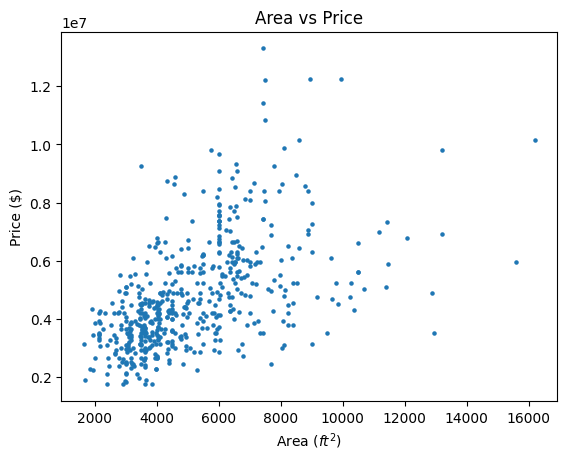

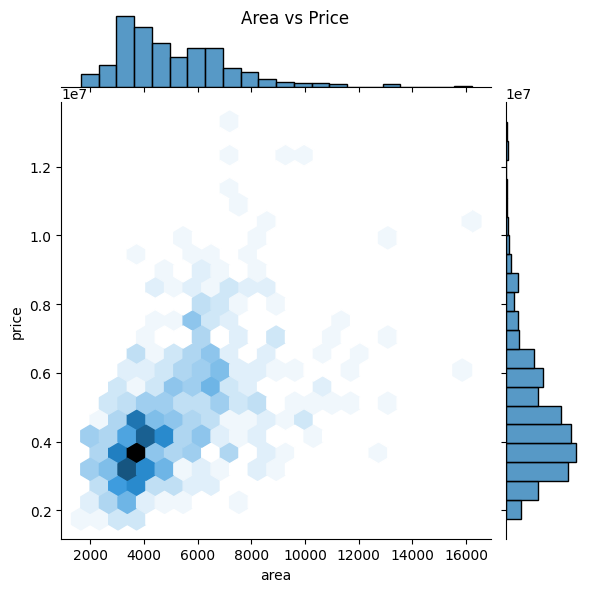

In [14]:
slr_Y = price_and_area["price"]
slr_X = price_and_area["area"]

# we can use a scatterplot to visualize area vs price (we set the size of the plot to 5 to make it more clear)
plt.scatter(slr_X, slr_Y, s=5)
plt.title("Area vs Price")
plt.xlabel("Area ($ft^2$)")
plt.ylabel("Price ($)")
plt.show()

# use a hexplot to visualize area vs price (since our data is dense, we can simply use the hexplot to visualize enclosed datapoints)
sns.jointplot(data=price_and_area, x="area", y="price", kind="hex")
plt.suptitle("Area vs Price")
plt.show()

### Modeling Process!

### 1. Define the formula of Simple Linear Regression
Now we visualized our data, let's look at our SLR's formula:
$$ \hat{y} = \theta_0 + \theta_1x $$

Explanation:
* $\hat{y}$: This is the output of the model. It's a dependent value and we call it as a "prediction" (or a "target").
* $x$: This is an input of the model. It's a independent and we call it as a "feature."
* $\theta_0$: It's an intercept term of the model. This is the place where our regression line crosses the y-axis.
* $\theta_1$ It's a slope of the model.

Note that $\theta_0$ and $\theta_1$ are our parametric models. To find most efficient parametric models, we should define a loss function that will be used in our cost function (our empirical risk).


### 2. Mean Squared Error and the Cost Function
To check our model's performance (to check our model works well or not), we should use a loss function and apply it to the cost function to check how the model performs to the entire dataset.

L2 loss:
$$ L(y_i, \hat{y_i}) = (y_i - \hat{y_i})^{2} $$
Cost Function (Empirical Risk):
$$ \hat{R}(\theta) = \frac{1}{n}\sum_{i=1}^{n}L(y_i, \hat{y_i}) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^{2} $$

Note that our cost function is called *Mean Squared Error* (MSE).

### 3. Finding Optimized Model Parameters
Let's find our optimized model parameters.


If we use an analytical approach...

### For $\hat{\theta_0}$:

$$ \frac{\partial}{\partial\theta_0} MSE = \frac{-2}{n}\sum_{i=1}^{n}y_i - \theta_0 - \theta_1x_i $$

Set this equation equal to 0 and solve for $\theta_0$

$$ \frac{1}{n}\sum_{i=1}^{n}y_i - \theta_0 - \theta_1x_i = 0 $$

$$ (\frac{1}{n}\sum_{i=1}^{n}y_i) = (\frac{1}{n}\sum_{i=1}^{n}\theta_0) + \theta_1(\frac{1}{n}\sum_{i=1}^{n}x_i) $$

$$ \bar{y} = \theta_0 + \theta_1\bar{x} $$

Therefore,
$$ \theta_0 = \bar{y} - \theta_1\bar{x} $$


### For $\hat{\theta_1}$:

$$ \frac{\partial}{\partial\theta_1} MSE = \frac{-2}{n}\sum_{i=1}^{n}(y_i - \theta_0 - \theta_1x_i)x_i $$

This is more complicated. Multiply the $\bar{x}$ to our equation of $\theta_0$ and subtract from the equation of $\theta_1$

$$ \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})x_i - \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})\bar{x} = 0 $$


Organize them to a simpler equation

$$ \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})(x_i - \bar{x}) = 0 $$

Now we know that 
$$\hat{\theta_0} = \bar{y} - \theta_1\bar{x}$$ 

Apply this to 
$$\hat{y} = \hat{\theta_0} + \hat{\theta_1}x_i$$

We get
$$\hat{y} = \bar{y} + \hat{\theta_1}(x_i - \bar{x})$$

Now plug in to the previous equation
$$\frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y} - \hat{\theta_1}(x_i - \bar{x}))(x_i - \bar{x}) = 0 $$

Simplify again -> multiply $(x_i - \bar{x})$ to group 1: $(y_i - \bar{y})$ and group 2: $\hat{\theta_1}(x_i - \bar{x})$
$$\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) - \hat{\theta_1} \times \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^{2} = 0$$

Simplify again!
$$\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y}) = \hat{\theta_1} \times \frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^{2}$$

Now we can use the definition of correlation and the standard deviation:
$$r = \frac{1}{n} \sum_{i=1}^n (\frac{x_i-\bar{x}}{\sigma_x})(\frac{y_i-\bar{y}}{\sigma_y}) $$
$$\sigma_x = \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2}$$

We use these definitions to simplify again...............:)

$$r \times \sigma_x\sigma_y = \hat{\theta_1}\times\sigma_x^{2}$$

We finally got our $\hat{\theta_1}$
$$\hat{\theta_1} = r\frac{\sigma_y}{\sigma_x}$$

### 4. Evaluate the fitted model's (SLR) performance

1. We can use the Root Mean Squared Error (RMSE) to measure the model's performance (how good are the predictions?). The square root of the Mean Squared Error shares the same unint of Y. If we have a lower Root Mean Squared error, our model's prediction is accurate. Here is the Root Mean Squared Error's formula: 
$$\sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$$

2. We also can visualize the residual plot ($e_i = y_i - \hat{y_i}$). This is a difference between the actual values and the predicted values. If our model fits well, the residual plot will not show any pattern between those values.

### Evaluate *without* using a scikit-learn

### Explanation:

`convert_to_standard_units`
- This function converts original units to standard units. Standard units' 0 is the mean of the original variable's units. 1 standard units is equal to 1 standard deviation from the original units

    - calculation: 
        1. subtract $x$ with mean of $x$ ($\bar{x})
        2. divide by the standard deviation of $x$ ($\sigma_x$)


`correlation`
- This function returns the correlation of two variables ($x$, $y$). A correlation represents the linear relationship between two variables. The range of correlation is $[-1, 1]$ where $|r| <= 1$ (denote correlation $r$).
    - If $r = 1$ -> perfect positive linear association.
    - If $r = -1$ -> perfect negative association.
    - If $r$ is close to $0$ -> the linear relationship of two variables is weak or non-existant.
    - If $r = 0$ -> two variables are 'uncorrelated'.

    - calculation:
        1. multiply $x$ and $y$ (they are in standard units)
        2. evaluate the mean of the product of x and y

`slope`
- This function returns the slope of two variables ($x$, $y$). The slope mentions the rate of changn in $y$ with respect to $x$.

    - calculation: multiply the correlation of x and y ($r$) with the standard deviation of y ($\sigma_y$) divide by the standard deviation of x ($\sigma_x$)

`intercept`
- This function returns the intercept of our linear model. The intercept of a linear regression model is simply the predicted value of $y$ when $x$ is 0.

    - calculation: subtract the mean of $y$ ($\bar{y}$) and the product of the slope and the mean of $x$ ($slope\times\bar{x}$)

`linear_regression_model`
- This function returns the $\hat{y}$ (the prediction).

    - calculation: add our $\theta_0$ and $\theta_1x$ ($\theta_0 + \theta_1x$)

`mean_squared_error`
- This funcntion returns the MSE of our $y$ and $\hat{y}$. 

    - calculation: simply calculate the mean of -> $(y - \hat{y})^{2}$

`calculation_results`
- This function returns every result of our calculations.

In [15]:
def convert_to_standard_units(x): 
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(convert_to_standard_units(x) * convert_to_standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y) * np.mean(x)

def linear_regression_model(x, theta_0, theta_1):
    return theta_0 + theta_1 * x

def MSE(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def calculation_results(x, y, theta_0, theta_1, y_hat):
    print("Mean of x:", np.mean(x), "Mean of y:", np.mean(y))
    print("Standard Deviation of x:", np.std(x), "Standard Deviation of y:", np.std(y))
    print("Correlation of x and y:", correlation(x, y))
    print("theta_0:", theta_0, "theta_1:", theta_1)
    print("Prediction (y_hat):")
    print(y_hat)
    print("RMSE (root mean squared error):", MSE(y, y_hat) ** (1 / 2))

### Let's visualize our prediction by displaying the regression line (from the Simple Linear Regression) on our scatter plot.

Mean of x: 5150.54128440367 Mean of y: 4766729.247706422
Standard Deviation of x: 2168.149153321305 Standard Deviation of y: 1868722.8281312082
Correlation of x and y: 0.53599734577808
theta_0: 2387308.4823964303 theta_1: 461.9748942727834
Prediction (y_hat):
0      5.815162e+06
1      6.526604e+06
2      6.988578e+06
3      5.852120e+06
4      5.815162e+06
           ...     
540    3.773233e+06
541    3.496048e+06
542    4.059658e+06
543    3.731655e+06
544    4.165912e+06
Name: area, Length: 545, dtype: float64
RMSE (root mean squared error): 1577612.5627607866


Text(0.5, 0.98, 'Prediction of price (y) given the area (x)')

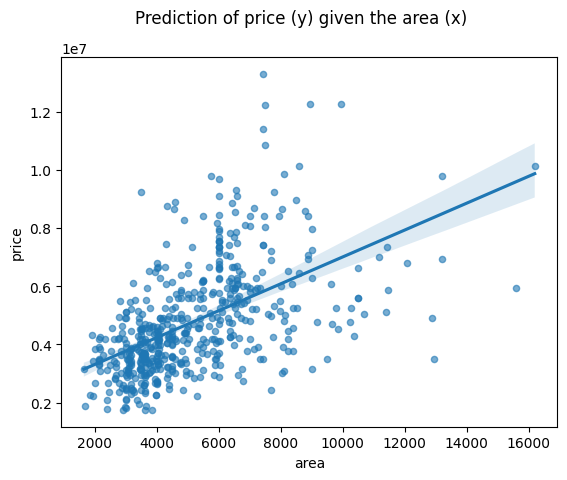

In [16]:
x = price_and_area["area"]
y = price_and_area["price"]

theta_0 = intercept(x, y)
theta_1 = slope(x, y)

y_hat = linear_regression_model(x, theta_0, theta_1)

calculation_results(x, y, theta_0, theta_1, y_hat)
sns.regplot(x="area", y="price", data=price_and_area, scatter_kws={"s": 20, "alpha": 0.6})
plt.suptitle("Prediction of price (y) given the area (x)")

### Now let's analyze how well the predictions generated by our model work by computing the residuals.

We will create a residual plot to check the difference between the original values and the predicted values.

Formula:
$$ e_i = y_i - \hat{y} $$

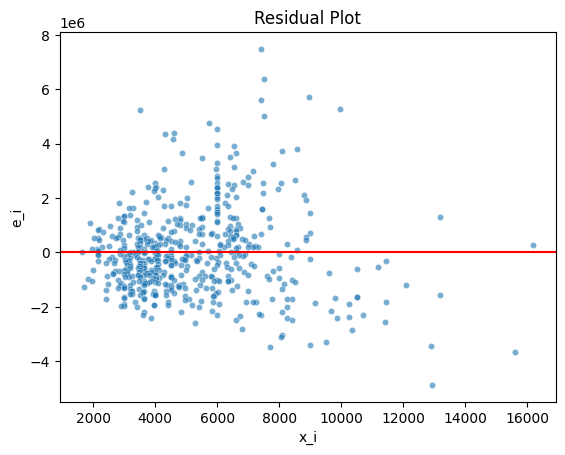

In [17]:
sns.scatterplot(x = x, y = y - y_hat, s=20, alpha=0.6)

# a horizontal residual line at y=0
plt.axhline(y=0, color='red', linestyle='-')

plt.title("Residual Plot")
plt.xlabel("x_i")
plt.ylabel("e_i")
plt.show()


Since the residual plot shows no discernible pattern and the residuals are randomly scattered around zero, it indicates that our model is making reasonable predictions!

### Evaluate with using a `scikit-learn`

### Explanation:

`calculation_results_with_scikit_learn`:
- This function prints out the intercept, slope, and the root mean squared error of our current model.
    - model.intercept_: returns the intercept term (theta_0) of our model
    - model.coef_: returns every parameter of our linear model (in this case we only have one parameter -> theta_1)
    - root_mean_squared_error: returns the RMSE (root mean squared error) of our model

`.fit`: 
- fit `X` and `Y` to our training data (run gradient descent behind the scenes and determine the optimal model parameters). `X` should use double brackets because by default, the `.fit` method expects two dimensional data.

`.predict`:
- it requires a one parameter, `X` (it's the design matrix that will be used to produce predictions). this gives a $\hat{y}$

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

def calculation_results_with_scikit_learn(Y, Y_hat, model):
    print("Intercept:", model.intercept_)
    print("Slope:", model.coef_[0])
    print("RMSE:", root_mean_squared_error(Y, Y_hat))


X = price_and_area[["area"]]
Y = price_and_area["price"]

lm = LinearRegression()
lm.fit(X, Y)
Y_hat = lm.predict(X)

calculation_results_with_scikit_learn(Y, Y_hat, lm)

Intercept: 2387308.48239643
Slope: 461.97489427278344
RMSE: 1577612.5627607866


`scikit-learn` is a great and effective tool for creating linear models. It streamlines the modeling process by providing built-in methods that save time and reduce the need for manual implementation. It gives the same answers that we've got from the above (an evaluating process that we've done without using a `scikit-learn`)